In [89]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [ ]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras' 

In [91]:
NUM_CLASSES = 7

In [92]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [93]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [95]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [96]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,        # Save only the best model
    save_weights_only=False     # Save full model
)

# Early stopping
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True   # Helps prevent overfitting
)


In [98]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [99]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
36/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1631 - loss: 1.9705
Epoch 1: val_loss improved from inf to 1.80323, saving model to model/keypoint_classifier/keypoint_classifier.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1645 - loss: 1.9686 - val_accuracy: 0.3281 - val_loss: 1.8032
Epoch 2/1000
23/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2720 - loss: 1.8323 
Epoch 2: val_loss improved from 1.80323 to 1.67600, saving model to model/keypoint_classifier/keypoint_classifier.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2749 - loss: 1.8251 - val_accuracy: 0.3808 - val_loss: 1.6760
Epoch 3/1000
28/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3251 - loss: 1.7245 
Epoch 3: val_loss improved from 1.67600 to 1.56029, saving model to model/keypoint_classifier/keypoint_classifier.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3269 - loss: 1.7217 - val_accuracy: 0.4529 - val_loss: 1.5603
Epoch 4/1000
27/37 ━━━━━━━━━━━━━━━━━━━

In [100]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9326 - loss: 0.3907  


In [101]:
model = tf.keras.models.load_model(model_save_path)

In [102]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[0.11969067 0.07057475 0.08754878 0.11944985 0.5855402  0.01640549
 0.00079031]
4


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


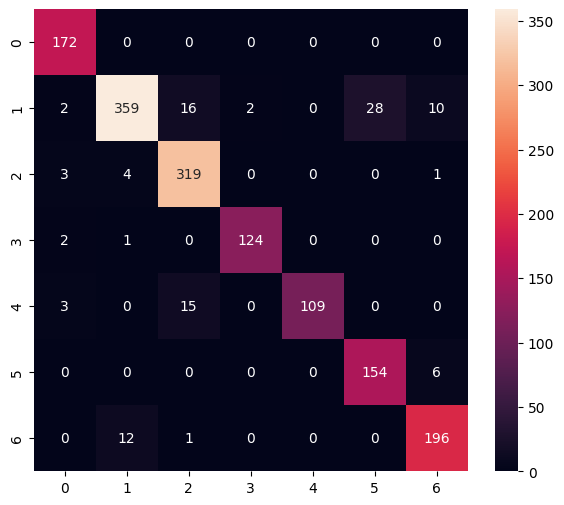

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       172
           1       0.95      0.86      0.91       417
           2       0.91      0.98      0.94       327
           3       0.98      0.98      0.98       127
           4       1.00      0.86      0.92       127
           5       0.85      0.96      0.90       160
           6       0.92      0.94      0.93       209

    accuracy                           0.93      1539
   macro avg       0.94      0.94      0.94      1539
weighted avg       0.93      0.93      0.93      1539



In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [104]:
model.save(model_save_path, include_optimizer=False)

In [105]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\moham\AppData\Local\Temp\tmp4q_wcg5n\assets


INFO:tensorflow:Assets written to: C:\Users\moham\AppData\Local\Temp\tmp4q_wcg5n\assets


Saved artifact at 'C:\Users\moham\AppData\Local\Temp\tmp4q_wcg5n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1667386600208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1667550498640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1667550507472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1667550505552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1667550509008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1667550497296: TensorSpec(shape=(), dtype=tf.resource, name=None)


6740

In [106]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [107]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [108]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [109]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [110]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.11969072 0.07057476 0.0875488  0.11944988 0.58554    0.01640549
 0.00079031]
4
